### **About**: The Notebook contains the code for data cleaning and preprocessing. Furthermore it contains our baseline Model - Logistic Regression

In [ ]:
pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 564.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.14.0 which is incompatible.


In [1]:
#Importing Libraries and packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import datetime
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [ ]:
#Importing Pandas AI Libraries and packages
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

#Passing the API Key
llm = OpenAI(api_token='***************************************************')


In [ ]:
pandas_ai = PandasAI(llm)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
PATH = f"/content/drive/MyDrive/PRACTICUM/LongCovid"

Reading Datasets

In [ ]:
response = pd.read_csv("/content/drive/MyDrive/PRACTICUM/LongCovid/longCOVID_response.csv")

In [ ]:
participant = pd.read_csv("/content/drive/MyDrive/PRACTICUM/LongCovid/longCOVID_participants.csv")

In [ ]:
install = pd.read_csv("/content/drive/MyDrive/PRACTICUM/LongCovid/longCOVID_installation_details.csv")

In [ ]:
notifications = pd.read_csv("/content/drive/MyDrive/PRACTICUM/LongCovid/longCOVID_notifications_details.csv")

Analysing and understanding the datasets

In [ ]:
response.head()

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,timeBasedNotificationId,timeBasedSurveyQuestionId
0,62237785b9762400186997a6,3.5,2022-03-05T14:45:09.000Z,2022-02-01T09:00:00.000Z,621e31e76d80aa5e27a04935,2022-03-05T14:45:20.000Z,0.0,responded,2022-03-05T14:45:25.000Z,6217540ecac2480018cdd05b,6217540ecac2480018cdd061,6217540ecac2480018cdd15a
1,622382cae4c81200185f0d71,3.5,2022-03-05T15:32:05.000Z,2022-03-05T15:14:00.000Z,621e31e76d80aa5e27a04935,2022-03-05T15:32:22.000Z,0.0,responded,2022-03-05T15:33:30.000Z,6217540ecac2480018cdd05b,6217540ecac2480018cdd05e,6217540ecac2480018cdd0a1
2,622382cae4c81200185f0d75,3.5,2022-03-05T15:32:48.000Z,2022-03-05T15:14:00.000Z,621e31e76d80aa5e27a04935,2022-03-05T15:32:55.000Z,0.0,responded,2022-03-05T15:33:30.000Z,6217540ecac2480018cdd05b,6217540ecac2480018cdd05e,6217540ecac2480018cdd0a7
3,622382cae4c81200185f0d73,3.5,2022-03-05T15:32:37.000Z,2022-03-05T15:14:00.000Z,621e31e76d80aa5e27a04935,2022-03-05T15:32:40.000Z,0.0,responded,2022-03-05T15:33:30.000Z,6217540ecac2480018cdd05b,6217540ecac2480018cdd05e,6217540ecac2480018cdd0a4
4,622382cae4c81200185f0d72,3.5,2022-03-05T15:32:26.000Z,2022-03-05T15:14:00.000Z,621e31e76d80aa5e27a04935,2022-03-05T15:32:36.000Z,0.0,responded,2022-03-05T15:33:30.000Z,6217540ecac2480018cdd05b,6217540ecac2480018cdd05e,6217540ecac2480018cdd0a3


In [ ]:
response.nunique()

_id                          832064
appVersion                       13
engageTimestamp              352031
probeTimestamp                21907
researchParticipantId           361
responseTimestamp            351965
reviewCount                       4
status                            5
submitTimestamp               18744
surveyId                          4
timeBasedNotificationId          23
timeBasedSurveyQuestionId       539
dtype: int64

In [ ]:
response.shape

(832064, 12)

In [ ]:
response.isna().sum()

_id                               0
appVersion                        0
engageTimestamp              441595
probeTimestamp                    0
researchParticipantId             0
responseTimestamp            441595
reviewCount                  441595
status                            0
submitTimestamp              441595
surveyId                          0
timeBasedNotificationId           0
timeBasedSurveyQuestionId         0
dtype: int64

In [ ]:
response.dtypes

_id                           object
appVersion                   float64
engageTimestamp               object
probeTimestamp                object
researchParticipantId         object
responseTimestamp             object
reviewCount                  float64
status                        object
submitTimestamp               object
surveyId                      object
timeBasedNotificationId       object
timeBasedSurveyQuestionId     object
dtype: object

In [ ]:
participant.head()

,_id,created,downloadTimestamp,mobileModelName,mobileOperatingSystemVersion,surveyId
0,6217540ecac2480018cdd182,2022-02-24T09:46:54.640Z,2022-03-05T10:57:48.576Z,Samsung SM-N950F,28,6217540ecac2480018cdd05b
1,621e31e76d80aa5e27a0492b,NaN,2022-03-06T13:03:32.049Z,iPhone XS Max,15.3.1,6217540ecac2480018cdd05b
2,621e31e76d80aa5e27a0492f,NaN,2022-03-09T15:37:10.569Z,"iPhone14,2",15.3.1,6217540ecac2480018cdd05b
3,621e31e76d80aa5e27a04933,NaN,2022-03-09T12:23:50.395Z,"iPhone13,3",15.3.1,6217540ecac2480018cdd05b
4,621e31e76d80aa5e27a04935,NaN,2022-03-05T11:19:06.725Z,Samsung SM-G780G,31,6217540ecac2480018cdd05b


In [ ]:
participant.nunique()

_id                             361
created                         129
downloadTimestamp               349
mobileModelName                 110
mobileOperatingSystemVersion     35
surveyId                          4
dtype: int64

In [ ]:
participant.isna().sum()

_id                              0
created                          4
downloadTimestamp               12
mobileModelName                 12
mobileOperatingSystemVersion    12
surveyId                         0
dtype: int64

In [ ]:
# Rename the '_id' column to 'researchParticipantId'
participant = participant.rename(columns={'_id' : 'researchParticipantId' } )

In [ ]:
participant.head()

,researchParticipantId,created,downloadTimestamp,mobileModelName,mobileOperatingSystemVersion,surveyId
0,6217540ecac2480018cdd182,2022-02-24T09:46:54.640Z,2022-03-05 10:57:48.576000+00:00,Samsung SM-N950F,28,6217540ecac2480018cdd05b
1,621e31e76d80aa5e27a0492b,NaN,2022-03-06 13:03:32.049000+00:00,iPhone XS Max,15.3.1,6217540ecac2480018cdd05b
2,621e31e76d80aa5e27a0492f,NaN,2022-03-09 15:37:10.569000+00:00,"iPhone14,2",15.3.1,6217540ecac2480018cdd05b
3,621e31e76d80aa5e27a04933,NaN,2022-03-09 12:23:50.395000+00:00,"iPhone13,3",15.3.1,6217540ecac2480018cdd05b
4,621e31e76d80aa5e27a04935,NaN,2022-03-05 11:19:06.725000+00:00,Samsung SM-G780G,31,6217540ecac2480018cdd05b


In [ ]:
install.head()

,_id,appId,created,deviceType,fitbitEncodedId,modified,participantIds,surveyIds,timeZone
0,620388fca2bee70018b0f264,success-app,2022-02-09T09:27:24.086Z,ios,44YJB6,2022-04-07T07:03:04.851Z,"['6225cc802e1724001820ad25', '6225cd2f91722b00...","[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
1,620fe1601ecf490018342efd,success-app,2022-02-18T18:11:44.540Z,ios,NaN,2022-03-09T15:37:10.581Z,['621e31e76d80aa5e27a0492f'],"[""6217540ecac2480018cdd05b""]",Europe/London
2,6213d0118ecd670018820631,success-app,2022-02-21T17:46:57.733Z,ios,7ZZY8Z,2022-07-14T07:48:03.634Z,"['622f516947e12f0018a933ee', '6282b681b4c68b00...","[""610a79d49f84830017d0ad4e"",""6282b681b4c68b001...",Europe/London
3,62153d99fc00c70018eb5f2b,success-app,2022-02-22T19:46:33.926Z,android,NaN,2022-09-16T13:58:46.382Z,['6282b681b4c68b0018c0a1f0'],"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time
4,621cb511908ec90018c8838c,success-app,2022-02-28T11:42:09.257Z,ios,8X94PF,2022-05-06T11:37:34.869Z,"['6242cb0a2bf2700018241e2e', '6274f91620838b00...","[""6242cb092bf2700018241c05"",""6274f91620838b001...",Europe/Dublin


In [ ]:
install.columns

Index(['_id', 'appId', 'created', 'deviceType', 'fitbitEncodedId', 'modified',
       'participantIds', 'surveyIds', 'timeZone'],
      dtype='object')

In [ ]:
install['participantIds']= install.apply(lambda row : row['participantIds'].strip('][').split(', '), axis=1)

In [ ]:
df_explode['participantIds']= df_explode.apply(lambda row : row['participantIds'].strip("'"), axis=1)

In [ ]:
df_explode

,_id,appId,created,deviceType,fitbitEncodedId,modified,participantIds,surveyIds,timeZone
0,620388fca2bee70018b0f264,success-app,2022-02-09T09:27:24.086Z,ios,44YJB6,2022-04-07T07:03:04.851Z,6225cc802e1724001820ad25,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,620388fca2bee70018b0f264,success-app,2022-02-09T09:27:24.086Z,ios,44YJB6,2022-04-07T07:03:04.851Z,6225cd2f91722b0018c6d861,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,620388fca2bee70018b0f264,success-app,2022-02-09T09:27:24.086Z,ios,44YJB6,2022-04-07T07:03:04.851Z,6225ce3291722b0018c6d87e,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,620388fca2bee70018b0f264,success-app,2022-02-09T09:27:24.086Z,ios,44YJB6,2022-04-07T07:03:04.851Z,6225cf0491722b0018c6d885,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,620388fca2bee70018b0f264,success-app,2022-02-09T09:27:24.086Z,ios,44YJB6,2022-04-07T07:03:04.851Z,6242cb0a2bf2700018241e24,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
...,...,...,...,...,...,...,...,...,...
388,6453845d40a1ca0016ff99c2,success-app,2023-05-04T10:09:33.879Z,android,NaN,2023-05-12T15:54:29.531Z,644925c981730c59df9b4a7b,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time
389,6454b3814122e2001675f9e2,success-app,2023-05-05T07:42:57.741Z,ios,NaN,2023-05-05T07:44:04.146Z,6282b681b4c68b0018c0a27d,"[""6282b681b4c68b0018c0a158""]",Europe/London
390,6456076b756a920016019fa1,success-app,2023-05-06T07:53:15.794Z,android,NaN,2023-05-14T08:38:56.168Z,63da66a2f50dcfecb07515d7,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time
391,645a72624d421f00164c7f3a,success-app,2023-05-09T16:18:42.683Z,ios,NaN,2023-05-09T16:19:49.691Z,63da66a2f50dcfecb07515d8,"[""6282b681b4c68b0018c0a158""]",Europe/London


In [ ]:
df_explode.shape

(415, 9)

In [ ]:
df_explode.isna().sum()

_id                  0
appId                0
created              0
deviceType           0
fitbitEncodedId    357
modified             0
participantIds       0
surveyIds            0
timeZone             0
dtype: int64

In [ ]:
#Exclude columns that are not required and columns with maximum rows as null ('fitbitEncodedId')
install_df_clean=df_explode[['created', 'deviceType', 'modified',
       'participantIds', 'surveyIds', 'timeZone']]

In [ ]:
#Rename participantsIds to researchParticipantId
install_df_clean.rename(columns={'participantIds':'researchParticipantId'}, inplace=True)

<ipython-input-316-386eb2211ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  install_df_clean.rename(columns={'participantIds':'researchParticipantId'}, inplace=True)


In [ ]:
#Rename created to install_created
install_df_clean.rename(columns={'created':'install_created'}, inplace=True)

<ipython-input-317-acd7867fa757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  install_df_clean.rename(columns={'created':'install_created'}, inplace=True)


In [ ]:
install_df_clean

,install_created,deviceType,modified,researchParticipantId,surveyIds,timeZone
0,2022-02-09T09:27:24.086Z,ios,2022-04-07T07:03:04.851Z,6225cc802e1724001820ad25,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,2022-02-09T09:27:24.086Z,ios,2022-04-07T07:03:04.851Z,6225cd2f91722b0018c6d861,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,2022-02-09T09:27:24.086Z,ios,2022-04-07T07:03:04.851Z,6225ce3291722b0018c6d87e,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,2022-02-09T09:27:24.086Z,ios,2022-04-07T07:03:04.851Z,6225cf0491722b0018c6d885,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
0,2022-02-09T09:27:24.086Z,ios,2022-04-07T07:03:04.851Z,6242cb0a2bf2700018241e24,"[""5fc0d850bd856d001765fb86"",""61c4902ddd3fc0001...",Europe/London
...,...,...,...,...,...,...
388,2023-05-04T10:09:33.879Z,android,2023-05-12T15:54:29.531Z,644925c981730c59df9b4a7b,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time
389,2023-05-05T07:42:57.741Z,ios,2023-05-05T07:44:04.146Z,6282b681b4c68b0018c0a27d,"[""6282b681b4c68b0018c0a158""]",Europe/London
390,2023-05-06T07:53:15.794Z,android,2023-05-14T08:38:56.168Z,63da66a2f50dcfecb07515d7,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time
391,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,63da66a2f50dcfecb07515d8,"[""6282b681b4c68b0018c0a158""]",Europe/London


In [ ]:
#Drop duplicate research participant id's by keeping latest installation info
install_df_clean = install_df_clean.sort_values('install_created').drop_duplicates(['researchParticipantId'], keep='last')

In [ ]:
install.timeZone.value_counts()

Europe/London          275
Greenwich Mean Time    105
Europe/Dublin           10
Europe/Paris             1
Europe/Zurich            1
Asia/Kolkata             1
Name: timeZone, dtype: int64

In [ ]:
install_df_clean.nunique()

install_created          279
deviceType                 2
modified                 279
researchParticipantId    295
surveyIds                 16
timeZone                   5
dtype: int64

In [ ]:
install_df_clean[install_df_clean.duplicated('researchParticipantId')]

,install_created,deviceType,modified,researchParticipantId,surveyIds,timeZone


In [ ]:
notifications.head()

,_id,descriptionText,endTime,index,initialiseNotifications,isFitbitSyncRequired,isInitialised,isQPROSurvey,isRelativeTiming,isSetImmediately,...,maxNumberOfProbes,responseTimeLimitInMins,startTime,surveyId,timeBasedValidation,timeGapInMins,title,type,validation,variance
0,6217540ecac2480018cdd05c,NaN,2023-01-31T00:00:00.000Z,0,False,False,False,False,False,NaN,...,7,75,2022-02-01T09:00:00.000Z,6217540ecac2480018cdd05b,"[{""type"":""timeGapInMins"",""value"":false},{""type...",1440,Morning,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0
1,6217540ecac2480018cdd05d,NaN,2023-01-31T00:00:00.000Z,1,False,NaN,False,NaN,False,NaN,...,7,75,2022-02-01T12:00:00.000Z,6217540ecac2480018cdd05b,"[{""type"":""timeGapInMins"",""value"":false},{""type...",1440,Early Afternoon,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0
2,6217540ecac2480018cdd05e,NaN,2023-01-31T00:00:00.000Z,2,False,NaN,False,NaN,False,NaN,...,7,75,2022-02-01T15:00:00.000Z,6217540ecac2480018cdd05b,"[{""type"":""timeGapInMins"",""value"":false},{""type...",1440,Late Afternoon,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0
3,6217540ecac2480018cdd05f,NaN,2023-01-31T00:00:00.000Z,3,False,NaN,False,NaN,False,NaN,...,7,75,2022-02-01T18:00:00.000Z,6217540ecac2480018cdd05b,"[{""type"":""timeGapInMins"",""value"":false},{""type...",1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0
4,6217540ecac2480018cdd062,NaN,2023-01-31T00:00:00.000Z,6,False,NaN,False,NaN,True,False,...,1,1440,2022-02-01T00:00:00.000Z,6217540ecac2480018cdd05b,"[{""type"":""timeGapInMins"",""value"":false},{""type...",110880,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN


In [ ]:
notifications.nunique()

_id                        23
descriptionText             0
endTime                     4
index                       8
initialiseNotifications     2
isFitbitSyncRequired        1
isInitialised               2
isQPROSurvey                1
isRelativeTiming            2
isSetImmediately            1
labelColor                  1
maxNumberOfProbes           3
responseTimeLimitInMins     3
startTime                  16
surveyId                    4
timeBasedValidation         1
timeGapInMins               4
title                       6
type                        1
validation                  1
variance                    1
dtype: int64

In [ ]:
# Rename the '_id' column to 'timeBasedNotificationId'
notifications = notifications.rename(columns={'_id' : 'timeBasedNotificationId' } )

Merge all 4 datasets

In [ ]:
merged_df = pd.merge(response, participant, on=['researchParticipantId', 'surveyId'])

In [ ]:
merged_df = pd.merge(merged_df, notifications, on=['timeBasedNotificationId', 'surveyId'])

In [ ]:
merged_df = pd.merge(merged_df, install_df_clean, on=['researchParticipantId'], how='left')

In [ ]:
merged_df.head()

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,timeGapInMins,title,type,validation,variance,install_created,deviceType,modified,surveyIds,timeZone
0,62237785b9762400186997a6,3.5,2022-03-05T14:45:09.000Z,2022-02-01T09:00:00.000Z,621e31e76d80aa5e27a04935,2022-03-05T14:45:20.000Z,0.0,responded,2022-03-05T14:45:25.000Z,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
1,6224b16c2e1724001820a421,3.7,2022-03-06T13:04:22.003Z,2022-02-01T09:00:00.000Z,621e31e76d80aa5e27a0492b,2022-03-06T13:04:42.188Z,1.0,responded,2022-03-06T13:04:44.191Z,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
2,62289c6e4353260018350829,3.7,2022-03-09T12:24:04.557Z,2022-02-01T09:00:00.000Z,621e31e76d80aa5e27a04933,2022-03-09T12:24:12.272Z,0.0,responded,2022-03-09T12:24:14.681Z,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-03-09T12:23:09.994Z,ios,2022-03-17T11:12:24.681Z,"[""6217540ecac2480018cdd05b""]",Europe/London
3,6229b919c3103100187eed7f,3.7,2022-03-10T08:38:33.242Z,2022-02-01T09:00:00.000Z,621e31e76d80aa5e27a0492f,2022-03-10T08:38:35.299Z,0.0,responded,2022-03-10T08:38:49.492Z,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-02-18T18:11:44.540Z,ios,2022-03-09T15:37:10.581Z,"[""6217540ecac2480018cdd05b""]",Europe/London
4,6229ceba75135e0018a5d03c,3.5,2022-03-10T10:10:53.000Z,2022-02-01T09:00:00.000Z,6217540ecac2480018cdd182,2022-03-10T10:11:00.000Z,0.0,responded,2022-03-10T10:11:04.000Z,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.nunique()

_id                             832064
appVersion                          13
engageTimestamp                 352031
probeTimestamp                   21907
researchParticipantId              361
responseTimestamp               351965
reviewCount                          4
status                               5
submitTimestamp                  18744
surveyId                             4
timeBasedNotificationId             23
timeBasedSurveyQuestionId          539
created                            129
downloadTimestamp                  349
mobileModelName                    110
mobileOperatingSystemVersion        35
descriptionText                      0
endTime                              4
index                                8
initialiseNotifications              2
isFitbitSyncRequired                 1
isInitialised                        2
isQPROSurvey                         1
isRelativeTiming                     2
isSetImmediately                     1
labelColor               

In [ ]:
merged_df.shape

(832064, 40)

In [ ]:
merged_df['engageTimestamp'] =  pd.to_datetime(merged_df['engageTimestamp'])
merged_df['probeTimestamp'] =  pd.to_datetime(merged_df['probeTimestamp'])
merged_df['responseTimestamp'] =  pd.to_datetime(merged_df['responseTimestamp'])
merged_df['submitTimestamp'] =  pd.to_datetime(merged_df['submitTimestamp'])
merged_df['downloadTimestamp'] =  pd.to_datetime(merged_df['downloadTimestamp'])
merged_df['created'] =  pd.to_datetime(merged_df['created'])
merged_df['startTime'] =  pd.to_datetime(merged_df['startTime'])

In [ ]:
merged_df.dtypes

_id                                          object
appVersion                                  float64
engageTimestamp                 datetime64[ns, UTC]
probeTimestamp                  datetime64[ns, UTC]
researchParticipantId                        object
responseTimestamp               datetime64[ns, UTC]
reviewCount                                 float64
status                                       object
submitTimestamp                 datetime64[ns, UTC]
surveyId                                     object
timeBasedNotificationId                      object
timeBasedSurveyQuestionId                    object
created                         datetime64[ns, UTC]
downloadTimestamp               datetime64[ns, UTC]
mobileModelName                              object
mobileOperatingSystemVersion                 object
descriptionText                             float64
endTime                                      object
index                                         int64
initialiseNo

In [ ]:
merged_df.isna().sum()

_id                                  0
appVersion                           0
engageTimestamp                 441595
probeTimestamp                       0
researchParticipantId                0
responseTimestamp               441595
reviewCount                     441595
status                               0
submitTimestamp                 441595
surveyId                             0
timeBasedNotificationId              0
timeBasedSurveyQuestionId            0
created                           2953
downloadTimestamp                25030
mobileModelName                  25030
mobileOperatingSystemVersion     25030
descriptionText                 832064
endTime                              0
index                                0
initialiseNotifications              0
isFitbitSyncRequired            831485
isInitialised                        0
isQPROSurvey                    831485
isRelativeTiming                     0
isSetImmediately                832062
labelColor               

In [ ]:
#Save the merged dataset
#merged_df.to_csv('/content/drive/MyDrive/epro_project_data/merged_df.csv', index=False)

In [ ]:
merged_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,timeGapInMins,title,type,validation,variance,install_created,deviceType,modified,surveyIds,timeZone
0,62237785b9762400186997a6,3.50,2022-03-05 14:45:09+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 14:45:20+00:00,0.0,responded,2022-03-05 14:45:25+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
1,6224b16c2e1724001820a421,3.70,2022-03-06 13:04:22.003000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a0492b,2022-03-06 13:04:42.188000+00:00,1.0,responded,2022-03-06 13:04:44.191000+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
2,62289c6e4353260018350829,3.70,2022-03-09 12:24:04.557000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a04933,2022-03-09 12:24:12.272000+00:00,0.0,responded,2022-03-09 12:24:14.681000+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-03-09T12:23:09.994Z,ios,2022-03-17T11:12:24.681Z,"[""6217540ecac2480018cdd05b""]",Europe/London
3,6229b919c3103100187eed7f,3.70,2022-03-10 08:38:33.242000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a0492f,2022-03-10 08:38:35.299000+00:00,0.0,responded,2022-03-10 08:38:49.492000+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-02-18T18:11:44.540Z,ios,2022-03-09T15:37:10.581Z,"[""6217540ecac2480018cdd05b""]",Europe/London
4,6229ceba75135e0018a5d03c,3.50,2022-03-10 10:10:53+00:00,2022-02-01 09:00:00+00:00,6217540ecac2480018cdd182,2022-03-10 10:11:00+00:00,0.0,responded,2022-03-10 10:11:04+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832059,6463bc6bc8042600164cb88d,3.18,2023-05-16 17:24:29.319000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:31.110000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London
832060,6463bc6bc8042600164cb886,3.18,2023-05-16 17:24:53.957000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:55.316000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London
832061,6463bc6bc8042600164cb888,3.18,2023-05-16 17:24:47.141000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:48.616000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London
832062,6463bc6bc8042600164cb88c,3.18,2023-05-16 17:24:23.844000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:28.552000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London


In [ ]:
#Read list of test partiicipants
test = pd.read_csv("/content/drive/MyDrive/PRACTICUM/long_covid_test_participants.csv", index_col = 0)

In [ ]:
nottest_df = merged_df[~merged_df['researchParticipantId'].isin(test.index)]

In [ ]:
nottest_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,timeGapInMins,title,type,validation,variance,install_created,deviceType,modified,surveyIds,timeZone
0,62237785b9762400186997a6,3.50,2022-03-05 14:45:09+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 14:45:20+00:00,0.0,responded,2022-03-05 14:45:25+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
1,6224b16c2e1724001820a421,3.70,2022-03-06 13:04:22.003000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a0492b,2022-03-06 13:04:42.188000+00:00,1.0,responded,2022-03-06 13:04:44.191000+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
2,62289c6e4353260018350829,3.70,2022-03-09 12:24:04.557000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a04933,2022-03-09 12:24:12.272000+00:00,0.0,responded,2022-03-09 12:24:14.681000+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-03-09T12:23:09.994Z,ios,2022-03-17T11:12:24.681Z,"[""6217540ecac2480018cdd05b""]",Europe/London
3,6229b919c3103100187eed7f,3.70,2022-03-10 08:38:33.242000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a0492f,2022-03-10 08:38:35.299000+00:00,0.0,responded,2022-03-10 08:38:49.492000+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-02-18T18:11:44.540Z,ios,2022-03-09T15:37:10.581Z,"[""6217540ecac2480018cdd05b""]",Europe/London
4,6229ceba75135e0018a5d03c,3.50,2022-03-10 10:10:53+00:00,2022-02-01 09:00:00+00:00,6217540ecac2480018cdd182,2022-03-10 10:11:00+00:00,0.0,responded,2022-03-10 10:11:04+00:00,6217540ecac2480018cdd05b,...,1,Reminder,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832059,6463bc6bc8042600164cb88d,3.18,2023-05-16 17:24:29.319000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:31.110000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London
832060,6463bc6bc8042600164cb886,3.18,2023-05-16 17:24:53.957000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:55.316000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London
832061,6463bc6bc8042600164cb888,3.18,2023-05-16 17:24:47.141000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:48.616000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London
832062,6463bc6bc8042600164cb88c,3.18,2023-05-16 17:24:23.844000+00:00,2023-05-16 16:50:00+00:00,63da66a2f50dcfecb07515d8,2023-05-16 17:24:28.552000+00:00,0.0,responded,2023-05-16 17:24:58.950000+00:00,6282b681b4c68b0018c0a158,...,1440,Evening,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2023-05-09T16:18:42.683Z,ios,2023-05-09T16:19:49.691Z,"[""6282b681b4c68b0018c0a158""]",Europe/London


In [ ]:
clean_df = nottest_df

In [ ]:
clean_df.probeTimestamp.min()

'2022-02-01 09:00:00+00:00'

In [ ]:
#Calculate "HowLongToEngage"
clean_df['HowLongToEngage'] = (clean_df['engageTimestamp'] - clean_df['probeTimestamp']).astype('timedelta64[s]')

<ipython-input-37-2b54aff7a17e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Calculate "HowLongToSubmit"
clean_df['HowLongToSubmit'] = (clean_df['submitTimestamp'] - clean_df['probeTimestamp']).astype('timedelta64[s]')

<ipython-input-38-6ea6b31d82eb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Find records with submit time greater than 24 hours
clean_df[clean_df['HowLongToSubmit'] > (60*60*24)]

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,type,validation,variance,install_created,deviceType,modified,surveyIds,timeZone,HowLongToEngage,HowLongToSubmit
0,62237785b9762400186997a6,3.5,2022-03-05 14:45:09+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 14:45:20+00:00,0.0,responded,2022-03-05 14:45:25+00:00,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN,2785509.0,2785525.0
1,6224b16c2e1724001820a421,3.7,2022-03-06 13:04:22.003000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a0492b,2022-03-06 13:04:42.188000+00:00,1.0,responded,2022-03-06 13:04:44.191000+00:00,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN,2865862.0,2865884.0
2,62289c6e4353260018350829,3.7,2022-03-09 12:24:04.557000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a04933,2022-03-09 12:24:12.272000+00:00,0.0,responded,2022-03-09 12:24:14.681000+00:00,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-03-09T12:23:09.994Z,ios,2022-03-17T11:12:24.681Z,"[""6217540ecac2480018cdd05b""]",Europe/London,3122644.0,3122654.0
3,6229b919c3103100187eed7f,3.7,2022-03-10 08:38:33.242000+00:00,2022-02-01 09:00:00+00:00,621e31e76d80aa5e27a0492f,2022-03-10 08:38:35.299000+00:00,0.0,responded,2022-03-10 08:38:49.492000+00:00,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,2022-02-18T18:11:44.540Z,ios,2022-03-09T15:37:10.581Z,"[""6217540ecac2480018cdd05b""]",Europe/London,3195513.0,3195529.0
4,6229ceba75135e0018a5d03c,3.5,2022-03-10 10:10:53+00:00,2022-02-01 09:00:00+00:00,6217540ecac2480018cdd182,2022-03-10 10:11:00+00:00,0.0,responded,2022-03-10 10:11:04+00:00,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",NaN,NaN,NaN,NaN,NaN,NaN,3201053.0,3201064.0


In [ ]:
clean_df=clean_df[clean_df['probeTimestamp']>'2022-02-01 09:00:00+00:00']

In [ ]:
clean_df.shape

(812126, 42)

In [ ]:
clean_df['status'].value_counts()

responded      389905
delivered      251275
unopened       137254
seen            29171
undelivered      4521
Name: status, dtype: int64

In [ ]:
clean_df[clean_df['status']=='undelivered']

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,type,validation,variance,install_created,deviceType,modified,surveyIds,timeZone,HowLongToEngage,HowLongToSubmit
186,6226539d7488500018eddc68,3.7,NaT,2022-03-07 14:54:00+00:00,621e31e76d80aa5e27a0492b,NaT,NaN,undelivered,NaT,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,6226539d7488500018eddc6a,3.7,NaT,2022-03-07 14:54:00+00:00,621e31e76d80aa5e27a0492b,NaT,NaN,undelivered,NaT,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,6226539d7488500018eddc69,3.7,NaT,2022-03-07 14:54:00+00:00,621e31e76d80aa5e27a0492b,NaT,NaN,undelivered,NaT,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,6226539d7488500018eddc6b,3.7,NaT,2022-03-07 14:54:00+00:00,621e31e76d80aa5e27a0492b,NaT,NaN,undelivered,NaT,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,6226539d7488500018eddc6c,3.7,NaT,2022-03-07 14:54:00+00:00,621e31e76d80aa5e27a0492b,NaT,NaN,undelivered,NaT,6217540ecac2480018cdd05b,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696384,62a1e75fd79f7a00187f82db,3.5,NaT,2022-06-08 16:51:00+00:00,6282b681b4c68b0018c0a208,NaT,NaN,undelivered,NaT,6282b681b4c68b0018c0a158,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2022-10-05T20:08:03.013Z,android,2022-10-12T17:36:31.737Z,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time,NaN,NaN
696385,62a1e75fd79f7a00187f82e9,3.5,NaT,2022-06-08 16:51:00+00:00,6282b681b4c68b0018c0a208,NaT,NaN,undelivered,NaT,6282b681b4c68b0018c0a158,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2022-10-05T20:08:03.013Z,android,2022-10-12T17:36:31.737Z,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time,NaN,NaN
696386,62a1e75fd79f7a00187f82e8,3.5,NaT,2022-06-08 16:51:00+00:00,6282b681b4c68b0018c0a208,NaT,NaN,undelivered,NaT,6282b681b4c68b0018c0a158,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2022-10-05T20:08:03.013Z,android,2022-10-12T17:36:31.737Z,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time,NaN,NaN
696387,62a1e75fd79f7a00187f82e2,3.5,NaT,2022-06-08 16:51:00+00:00,6282b681b4c68b0018c0a208,NaT,NaN,undelivered,NaT,6282b681b4c68b0018c0a158,...,timeBased,"[{""type"":""startDate"",""value"":false},{""type"":""e...",15.0,2022-10-05T20:08:03.013Z,android,2022-10-12T17:36:31.737Z,"[""6282b681b4c68b0018c0a158""]",Greenwich Mean Time,NaN,NaN


In [ ]:
#Drop records with status undelivered
clean_df = clean_df[clean_df['status'] != 'undelivered']

In [ ]:
#Squeeze the dataset based on unique notification id's and exclude multiple question Id's of the same notification
unique_participant_notification=clean_df.drop_duplicates(subset=['timeBasedNotificationId','researchParticipantId','probeTimestamp'])

In [ ]:
unique_participant_notification.shape

(26914, 42)

In [ ]:
clean_df = unique_participant_notification

In [ ]:
# Extract day of the week and time of day from submit timestamps
clean_df['submit_weekday'] = clean_df['submitTimestamp'].dt.dayofweek
clean_df['submitHour'] = clean_df['submitTimestamp'].dt.hour


In [ ]:
#Extract Probe time date
clean_df['probeTime_date']=clean_df['probeTimestamp'].dt.floor('D')

In [ ]:
#Extract probe hour from probe timestamp
clean_df['probeHour'] = clean_df['probeTimestamp'].dt.hour

In [ ]:
# Extract day of the week and time of day from probe timestamps
clean_df['probe_weekday'] = clean_df['probeTimestamp'].dt.dayofweek
clean_df['probe_day'] = clean_df['probeTimestamp'].dt.day

In [ ]:
#Extract Probe time week
clean_df['probeTime_week']=clean_df['probeTimestamp'].dt.isocalendar().week

In [ ]:
#Extract Probe time year
clean_df['probeTime_year']=clean_df['probeTimestamp'].dt.year

In [ ]:
#Find glitch records due to app glitch
glitch_df=clean_df[clean_df.duplicated(subset=['timeBasedNotificationId', 'probeTime_date', 'researchParticipantId'], keep='last')]

In [ ]:
#Remove records with glitch
notglitch_df=clean_df[~clean_df.duplicated(subset=['timeBasedNotificationId', 'probeTime_date', 'researchParticipantId'], keep='last')]

In [ ]:
notglitch_df['status'].value_counts()

responded    18508
unopened      4405
delivered     3181
seen           704
Name: status, dtype: int64

In [ ]:
clean_df = notglitch_df

In [ ]:
clean_df['responseTimeLimitInMins'].value_counts()

75      26796
1440        2
Name: responseTimeLimitInMins, dtype: int64

In [ ]:
#Drop value with responseTimeLimitInMins 1440
clean_df = clean_df[~(clean_df['responseTimeLimitInMins'] == 1440)]

In [ ]:
clean_df['responseTimeLimitInMins'].value_counts()

75    26796
Name: responseTimeLimitInMins, dtype: int64

In [ ]:
clean_df.sort_values(by=['probeTimestamp','researchParticipantId'], inplace=True)

<ipython-input-62-34064fd5456b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df.dtypes

_id                                          object
appVersion                                  float64
engageTimestamp                 datetime64[ns, UTC]
probeTimestamp                  datetime64[ns, UTC]
researchParticipantId                        object
responseTimestamp               datetime64[ns, UTC]
reviewCount                                 float64
status                                       object
submitTimestamp                 datetime64[ns, UTC]
surveyId                                     object
timeBasedNotificationId                      object
timeBasedSurveyQuestionId                    object
created                         datetime64[ns, UTC]
downloadTimestamp               datetime64[ns, UTC]
mobileModelName                              object
mobileOperatingSystemVersion                 object
descriptionText                             float64
endTime                                      object
index                                         int64
initialiseNo

In [ ]:
clean_df.duplicated().sum()

0

In [ ]:
clean_df['notification_number'] = (clean_df.groupby(['researchParticipantId'])['probeTimestamp']
                      .rank(method='dense')
                      .astype(int)
                   )

<ipython-input-65-a9e412c60231>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df['day_notification_number'] = (clean_df.groupby(['researchParticipantId','probeTime_date'])['probeTimestamp'].rank(method='dense')
                      .astype(int)
                   )

<ipython-input-66-2ad81c5b5822>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import datetime

In [ ]:
#Function to add a continued week count
def add_continued_week_field(date, df_start_date='2022-02-01'):
    start_date = datetime.datetime.strptime(df_start_date, '%Y-%m-%d')
    year_of_start_date = start_date.year
    year_of_date = date.year
    week_of_date = date.strftime("%U")
    year_diff = year_of_date - year_of_start_date
    if year_diff == 0:
        continued_week = int(week_of_date)
    else:
        continued_week = year_diff * 52 + int(week_of_date)
    return continued_week

In [ ]:
clean_df['Week_continue'] = clean_df['probeTimestamp'].apply(add_continued_week_field)

<ipython-input-69-7493da5c6628>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df['cycle'] = (clean_df.groupby(['researchParticipantId'])['Week_continue'].rank(method='dense')
                      .astype(int)
                   )

<ipython-input-70-13f001f339e4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probeTime_date,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle
5,622382cae4c81200185f0d71,3.50,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,2022-03-05 00:00:00+00:00,15,5,5,9,2022,1,1,9,1
1309,6223da17b976240018699a93,3.50,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,2022-03-05 00:00:00+00:00,17,5,5,9,2022,2,2,9,1
618,6223da17b976240018699a80,3.50,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,2022-03-05 00:00:00+00:00,20,5,5,9,2022,3,3,9,1
1884,622479b2e4c81200185f14d6,3.50,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,2022-03-06 00:00:00+00:00,9,6,6,9,2022,4,1,10,2
2463,6224ab092e1724001820a3f5,3.50,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,2022-03-06 00:00:00+00:00,12,6,6,9,2022,5,2,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508504,646cca38c3a22000166722e4,3.80,NaT,2023-05-23 11:55:00+00:00,63da66a2f50dcfecb0751570,NaT,NaN,delivered,NaT,6282b681b4c68b0018c0a158,...,2023-05-23 00:00:00+00:00,11,1,23,21,2023,61,2,73,4
656663,646ce1835d59aa001699d946,3.18,2023-05-23 15:53:15.437000+00:00,2023-05-23 14:54:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 15:53:23.279000+00:00,0.0,responded,2023-05-23 15:53:39.620000+00:00,6282b681b4c68b0018c0a158,...,2023-05-23 00:00:00+00:00,14,1,23,21,2023,41,1,73,3
805725,646cfcce5d59aa001699d9bf,3.18,2023-05-23 17:48:01.714000+00:00,2023-05-23 17:47:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 17:48:06.449000+00:00,0.0,responded,2023-05-23 17:50:06.070000+00:00,6282b681b4c68b0018c0a158,...,2023-05-23 00:00:00+00:00,17,1,23,21,2023,42,2,73,3
166740,646d27040a1a7e0016defa45,3.18,2023-05-23 20:49:13.556000+00:00,2023-05-23 20:48:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 20:49:16.473000+00:00,0.0,responded,2023-05-23 20:50:12.053000+00:00,6282b681b4c68b0018c0a158,...,2023-05-23 00:00:00+00:00,20,1,23,21,2023,43,3,73,3


In [ ]:
clean_df.nunique()

_id                             26796
appVersion                         13
engageTimestamp                 18501
probeTimestamp                  21321
researchParticipantId             357
responseTimestamp               18499
reviewCount                         4
status                              4
submitTimestamp                 18501
surveyId                            4
timeBasedNotificationId            20
timeBasedSurveyQuestionId         340
created                           128
downloadTimestamp                 345
mobileModelName                   110
mobileOperatingSystemVersion       34
descriptionText                     0
endTime                             3
index                               6
initialiseNotifications             1
isFitbitSyncRequired                1
isInitialised                       1
isQPROSurvey                        1
isRelativeTiming                    1
isSetImmediately                    0
labelColor                          1
maxNumberOfP

In [ ]:
clean_df.isna().sum()

_id                                 0
appVersion                          0
engageTimestamp                  8288
probeTimestamp                      0
researchParticipantId               0
responseTimestamp                8288
reviewCount                      8288
status                              0
submitTimestamp                  8288
surveyId                            0
timeBasedNotificationId             0
timeBasedSurveyQuestionId           0
created                           105
downloadTimestamp                 971
mobileModelName                   971
mobileOperatingSystemVersion      971
descriptionText                 26796
endTime                             0
index                               0
initialiseNotifications             0
isFitbitSyncRequired            26778
isInitialised                       0
isQPROSurvey                    26778
isRelativeTiming                    0
isSetImmediately                26796
labelColor                          0
maxNumberOfP

In [ ]:
#Fill null values in variance column with it's mean
clean_df['variance'].fillna(clean_df['variance'].mean(), inplace=True)

<ipython-input-74-a1f1030d7f9a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
#Function to find first probe date
def fill_create_date(participant, df=clean_df):
    first_probe_date= df[df['researchParticipantId']==participant]['probeTimestamp'].min()
    return first_probe_date

In [ ]:
#Fill 'created' where null with first probe date
clean_df['created'] = clean_df.apply(
    lambda row:
    fill_create_date(row['researchParticipantId'])
    if pd.isna(row['created'])
    else row['created'],
    axis=1
)

<ipython-input-77-baf302921b23>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col         = 'status'
conditions  = [ clean_df[col] != 'responded', clean_df[col] == 'responded' ]
choices     = [ 0 , 1 ]

clean_df['class'] = np.select(conditions, choices, default=np.nan).astype(int)

<ipython-input-78-298e6b54f86f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df.nunique()

_id                             26796
appVersion                         13
engageTimestamp                 18501
probeTimestamp                  21321
researchParticipantId             357
responseTimestamp               18499
reviewCount                         4
status                              4
submitTimestamp                 18501
surveyId                            4
timeBasedNotificationId            20
timeBasedSurveyQuestionId         340
created                           132
downloadTimestamp                 345
mobileModelName                   110
mobileOperatingSystemVersion       34
descriptionText                     0
endTime                             3
index                               6
initialiseNotifications             1
isFitbitSyncRequired                1
isInitialised                       1
isQPROSurvey                        1
isRelativeTiming                    1
isSetImmediately                    0
labelColor                          1
maxNumberOfP

In [ ]:
clean_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
#Save the cleaned dataset
#clean_df.to_csv('/content/drive/MyDrive/epro_project_data/clean_df.csv', index=False)

In [4]:
clean_df = pd.read_csv('/content/drive/MyDrive/epro_project_data/clean_df.csv')

<ipython-input-4-2706cdc5d5a5>:1: DtypeWarning: Columns (20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv('/content/drive/MyDrive/epro_project_data/clean_df.csv')


In [5]:
clean_df['engageTimestamp'] =  pd.to_datetime(clean_df['engageTimestamp'])
clean_df['probeTimestamp'] =  pd.to_datetime(clean_df['probeTimestamp'])
clean_df['responseTimestamp'] =  pd.to_datetime(clean_df['responseTimestamp'])
clean_df['submitTimestamp'] =  pd.to_datetime(clean_df['submitTimestamp'])
clean_df['downloadTimestamp'] =  pd.to_datetime(clean_df['downloadTimestamp'])
clean_df['created'] =  pd.to_datetime(clean_df['created'])
clean_df['startTime'] =  pd.to_datetime(clean_df['startTime'])

##Exploratory Data Analysis

Historical analysis of median Time taken to respond by participants per day

In [ ]:
time_vs_response=clean_df[['probeTime_date','HowLongToSubmit']]

In [ ]:
time_vs_response

,probeTime_date,HowLongToSubmit
0,2022-03-05 00:00:00+00:00,1170.0
1,2022-03-05 00:00:00+00:00,NaN
2,2022-03-05 00:00:00+00:00,3359.0
3,2022-03-06 00:00:00+00:00,357.0
4,2022-03-06 00:00:00+00:00,2009.0
...,...,...
26791,2023-05-23 00:00:00+00:00,NaN
26792,2023-05-23 00:00:00+00:00,3579.0
26793,2023-05-23 00:00:00+00:00,186.0
26794,2023-05-23 00:00:00+00:00,132.0


In [ ]:
df_plot=time_vs_response.groupby('probeTime_date')['HowLongToSubmit'].median().reset_index()

In [ ]:
df_plot.dtypes

probeTime_date      object
HowLongToSubmit    float64
dtype: object

In [ ]:
df_plot['probeTime_date'] =  pd.to_datetime(df_plot['probeTime_date'])

In [ ]:
df_plot['probeTime_date']=df_plot['probeTime_date'].apply(lambda x: datetime.strftime(x,'%Y-%m-%d'))

In [ ]:
df_plot.set_index('probeTime_date', inplace=True)

In [ ]:
#Plot Historical analysis of Cumulative Time taken to respond by participants per day
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot.HowLongToSubmit,
                    mode='lines'))

# Update the layout with the title
fig.update_layout(title_text="Median time taken to respond by participants per day")

fig.show()

**Key Findings:**


1.   January 1, 2022 has outliers. The probes made on this day have longer than normal response time
2.   There are missing values from April 22, 2022 until May 4, 2022
3.   Missing dates on December 31, 2022
4.   Missing dates from January 5, 2023 until January 11, 2023
5.   Missing dates from May 17, 2023 until May 19, 2023
6.   NO pattern or Seasonality were Observed

Analyzing the distribution of notification sent times

In [6]:
notification_submit_times = clean_df['submitHour']
notification_probe_times = clean_df['probeHour']

In [ ]:
#Distribution of the notification submit times based of submitTimestamp Hours
# Create the histogram trace
histogram_trace = go.Histogram(x=notification_submit_times, nbinsx=24)

# Create the layout
layout = go.Layout(
    title="Distribution of Notification Submit Times",
    xaxis=dict(title="Notification Submit Hour",
               tickvals=list(range(24)),  # Setting the tick values to be 0, 1, 2, ..., 23
               ),
    yaxis=dict(title="Frequency")
)

# Create the figure
figure = go.Figure(data=[histogram_trace], layout=layout)

# Display the figure
figure.show()


In [ ]:
notification_submit_times.describe()

count    18508.000000
mean        14.300465
std          4.295006
min          0.000000
25%         11.000000
50%         14.000000
75%         18.000000
max         23.000000
Name: submitHour, dtype: float64

Analyzing the distribution of notification probe times

In [ ]:
#Distribution of the notification probe times based of probeTimestamp Hour
# Create the histogram trace
histogram_trace = go.Histogram(x=notification_probe_times, nbinsx=24)

# Create the layout
layout = go.Layout(
    title="Distribution of Notification Probe Times",
    xaxis=dict(title="Notification Probe Hour",
               tickvals=list(range(24))),
    yaxis=dict(title="Frequency")
)

# Create the figure
figure = go.Figure(data=[histogram_trace], layout=layout)

# Display the figure
figure.show()


Analyzing response rates by day of the week

In [ ]:
# Extract the day of the week from the 'submitTimestamp' column and calculate the count of submissions for each day
submit_count_by_day = clean_df['submitTimestamp'].dt.dayofweek.value_counts()

In [ ]:
submit_count_by_day

3.0    3991
4.0    2648
5.0    2443
0.0    2386
6.0    2384
1.0    2330
2.0    2326
Name: submitTimestamp, dtype: int64

In [ ]:
# Define the names for each day of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot to visualize the response rate by day of the week
fig = go.Figure(data=go.Bar(x=day_names, y=submit_count_by_day))
fig.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Response Rate',
    title='Response Rate by Day of the Week'
)
fig.show()


In [ ]:
clean_df['class'].value_counts()

In [ ]:
clean_df.head()

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class
0,622382cae4c81200185f0d71,3.5,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,15,5,5,9,2022,1,1,9,1,1
1,6223da17b976240018699a93,3.5,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,17,5,5,9,2022,2,2,9,1,0
2,6223da17b976240018699a80,3.5,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,20,5,5,9,2022,3,3,9,1,1
3,622479b2e4c81200185f14d6,3.5,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,9,6,6,9,2022,4,1,10,2,1
4,6224ab092e1724001820a3f5,3.5,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,12,6,6,9,2022,5,2,10,2,1


In [ ]:
clean_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
# Count the occurrences of each class
class_counts = clean_df['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Plot using Plotly bar plot
fig = px.bar(class_counts, x='Class', y='Count', text='Count', color='Class', labels={'Class': 'Class', 'Count': 'Count'},
             title='Responded vs Not Responded Samples', template='plotly_white')

# Update the layout for better appearance
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    xaxis=dict(tickvals=[0, 1], ticktext=['Not Responded', 'Responded']),
    showlegend=False
)

# Show the plot
fig.show()

Cluster Analysis

In [7]:
# Group the merged_df DataFrame by 'researchParticipantId' and 'submitHour' and calculate the count
df_submit_hours = clean_df.groupby(['researchParticipantId', 'submitHour']).size().unstack(fill_value=0)


In [8]:
# Reindex the DataFrame to include all submit hours from 0 to 23
df_submit_hours = df_submit_hours.reindex(columns=range(24), fill_value=0)

In [9]:
df_submit_hours

submitHour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
researchParticipantId,,,,,,,,,,,,,,,,,,,,,
621e31e76d80aa5e27a0492b,0,0,0,0,0,0,0,0,0,3,...,0,3,1,0,5,1,2,2,0,0
621e31e76d80aa5e27a0492f,0,0,0,0,0,0,0,0,0,6,...,1,4,0,0,5,0,2,5,0,0
621e31e76d80aa5e27a04933,0,0,0,0,0,0,0,0,0,1,...,1,3,0,3,0,0,1,0,0,0
621e31e76d80aa5e27a04935,0,0,0,0,0,0,0,0,0,4,...,1,3,1,1,5,0,2,3,0,0
6229c07c75135e0018a5ce01,0,0,0,0,0,0,0,0,0,3,...,0,4,0,2,3,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644925c981730c59df9b4a8e,0,0,0,0,0,0,0,1,4,0,...,4,0,0,1,0,1,2,0,0,0
644925c981730c59df9b4a8f,0,0,0,0,0,0,0,1,3,0,...,0,1,1,3,0,0,1,1,0,0
644925c981730c59df9b4a90,0,0,0,0,0,0,0,1,7,0,...,4,0,1,3,1,0,7,1,0,0


In [ ]:
#df_submit_hours.to_csv('/content/drive/MyDrive/Notebooks/df_submit_hours.csv', index=False)

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_submit_hours)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

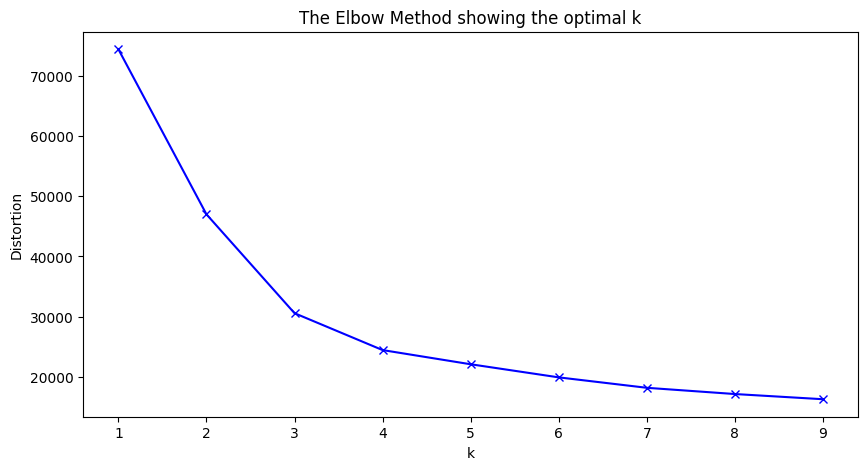

In [11]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
# Perform clustering on the df_submit_hours DataFrame
kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters
cluster_labels = kmeans.fit_predict(df_submit_hours)

# Add the cluster labels to the DataFrame
df_submit_hours['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df_submit_hours

submitHour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
researchParticipantId,,,,,,,,,,,,,,,,,,,,,
621e31e76d80aa5e27a0492b,0,0,0,0,0,0,0,0,0,3,...,3,1,0,5,1,2,2,0,0,1
621e31e76d80aa5e27a0492f,0,0,0,0,0,0,0,0,0,6,...,4,0,0,5,0,2,5,0,0,1
621e31e76d80aa5e27a04933,0,0,0,0,0,0,0,0,0,1,...,3,0,3,0,0,1,0,0,0,1
621e31e76d80aa5e27a04935,0,0,0,0,0,0,0,0,0,4,...,3,1,1,5,0,2,3,0,0,1
6229c07c75135e0018a5ce01,0,0,0,0,0,0,0,0,0,3,...,4,0,2,3,0,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644925c981730c59df9b4a8e,0,0,0,0,0,0,0,1,4,0,...,0,0,1,0,1,2,0,0,0,1
644925c981730c59df9b4a8f,0,0,0,0,0,0,0,1,3,0,...,1,1,3,0,0,1,1,0,0,1
644925c981730c59df9b4a90,0,0,0,0,0,0,0,1,7,0,...,0,1,3,1,0,7,1,0,0,1


In [14]:
cluster_counts = df_submit_hours['Cluster'].value_counts()

In [15]:
cluster_counts

1    201
2     81
0     70
Name: Cluster, dtype: int64

In [16]:
def get_centroids(df, kpi):
        """
            Given the clustering results, calculates cluster centroids adn plots them
        :param df: dataframe with the clustered data
        :param kpi: str, kpi according to which the entities are clustered
        :return centroids_df: dataframe with centroids' feature values
        """

        centroids_df = df.groupby('Cluster').mean().T
        return centroids_df

In [17]:
centroids_df=get_centroids(df_submit_hours, 'submit_hour')

In [22]:
def get_cluster_profiles(df, centroids_df, entity_column, kpi, n_cols=2):

        """
            Plots cluster profiles (entities belonging to the cluster and cluster centroids)
        :param df: dataframe with the clustered data
        :param centroids_df: dataframe with centroids' feature values
        :param entity_column: str, entity column name
        :param kpi: str, kpi according to which the entities are clustered
        :param n_cols: int, number of columns
        :return:
        """

        clust_perc = 100 * df['Cluster'].value_counts(normalize=True)
        num_interfaces = df['Cluster'].value_counts()
        n_rows = int(np.ceil(df['Cluster'].nunique() / n_cols))
        fontsize = 15

        fig = plt.figure(figsize=(30, 20))
        fig.subplots_adjust(hspace=0.4, wspace=0.1)
        fig.suptitle(f'Cluster profiles - Hourly Total of Submitted Responses')

        for i, clust_n in enumerate(clust_perc.index):
            ax = fig.add_subplot(n_rows, n_cols, i + 1)
            one_cluster = df[df['Cluster'] == clust_n].T[:-1]

            tidy_one = one_cluster.stack().reset_index().rename(columns={'submitHour': 'timestamp', 0: 'values'})

            p1 = sns.lineplot(data=tidy_one, x='timestamp', y='values', hue=entity_column, legend=False, ax=ax,
                              alpha=0.35)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
            lines = p1.get_lines()
            [l.set_color('grey') for l in lines]
            sns.lineplot(data=centroids_df[[clust_n]], x=centroids_df.index, y=centroids_df[clust_n],
                         legend=False, ax=ax, color='#800000', linewidth=2)

            plt.title('clust: {}, perc: {:.1f}%, Total:{} Participants'.format(clust_n,
                                                                             clust_perc.loc[clust_n],
                                                                             num_interfaces.loc[clust_n]),
                      fontsize=fontsize + 3)
            plt.xlabel('Hours', fontsize=fontsize - 3)
            plt.ylabel('Total responses', fontsize=fontsize - 3)
            plt.grid()

        plt.tight_layout()

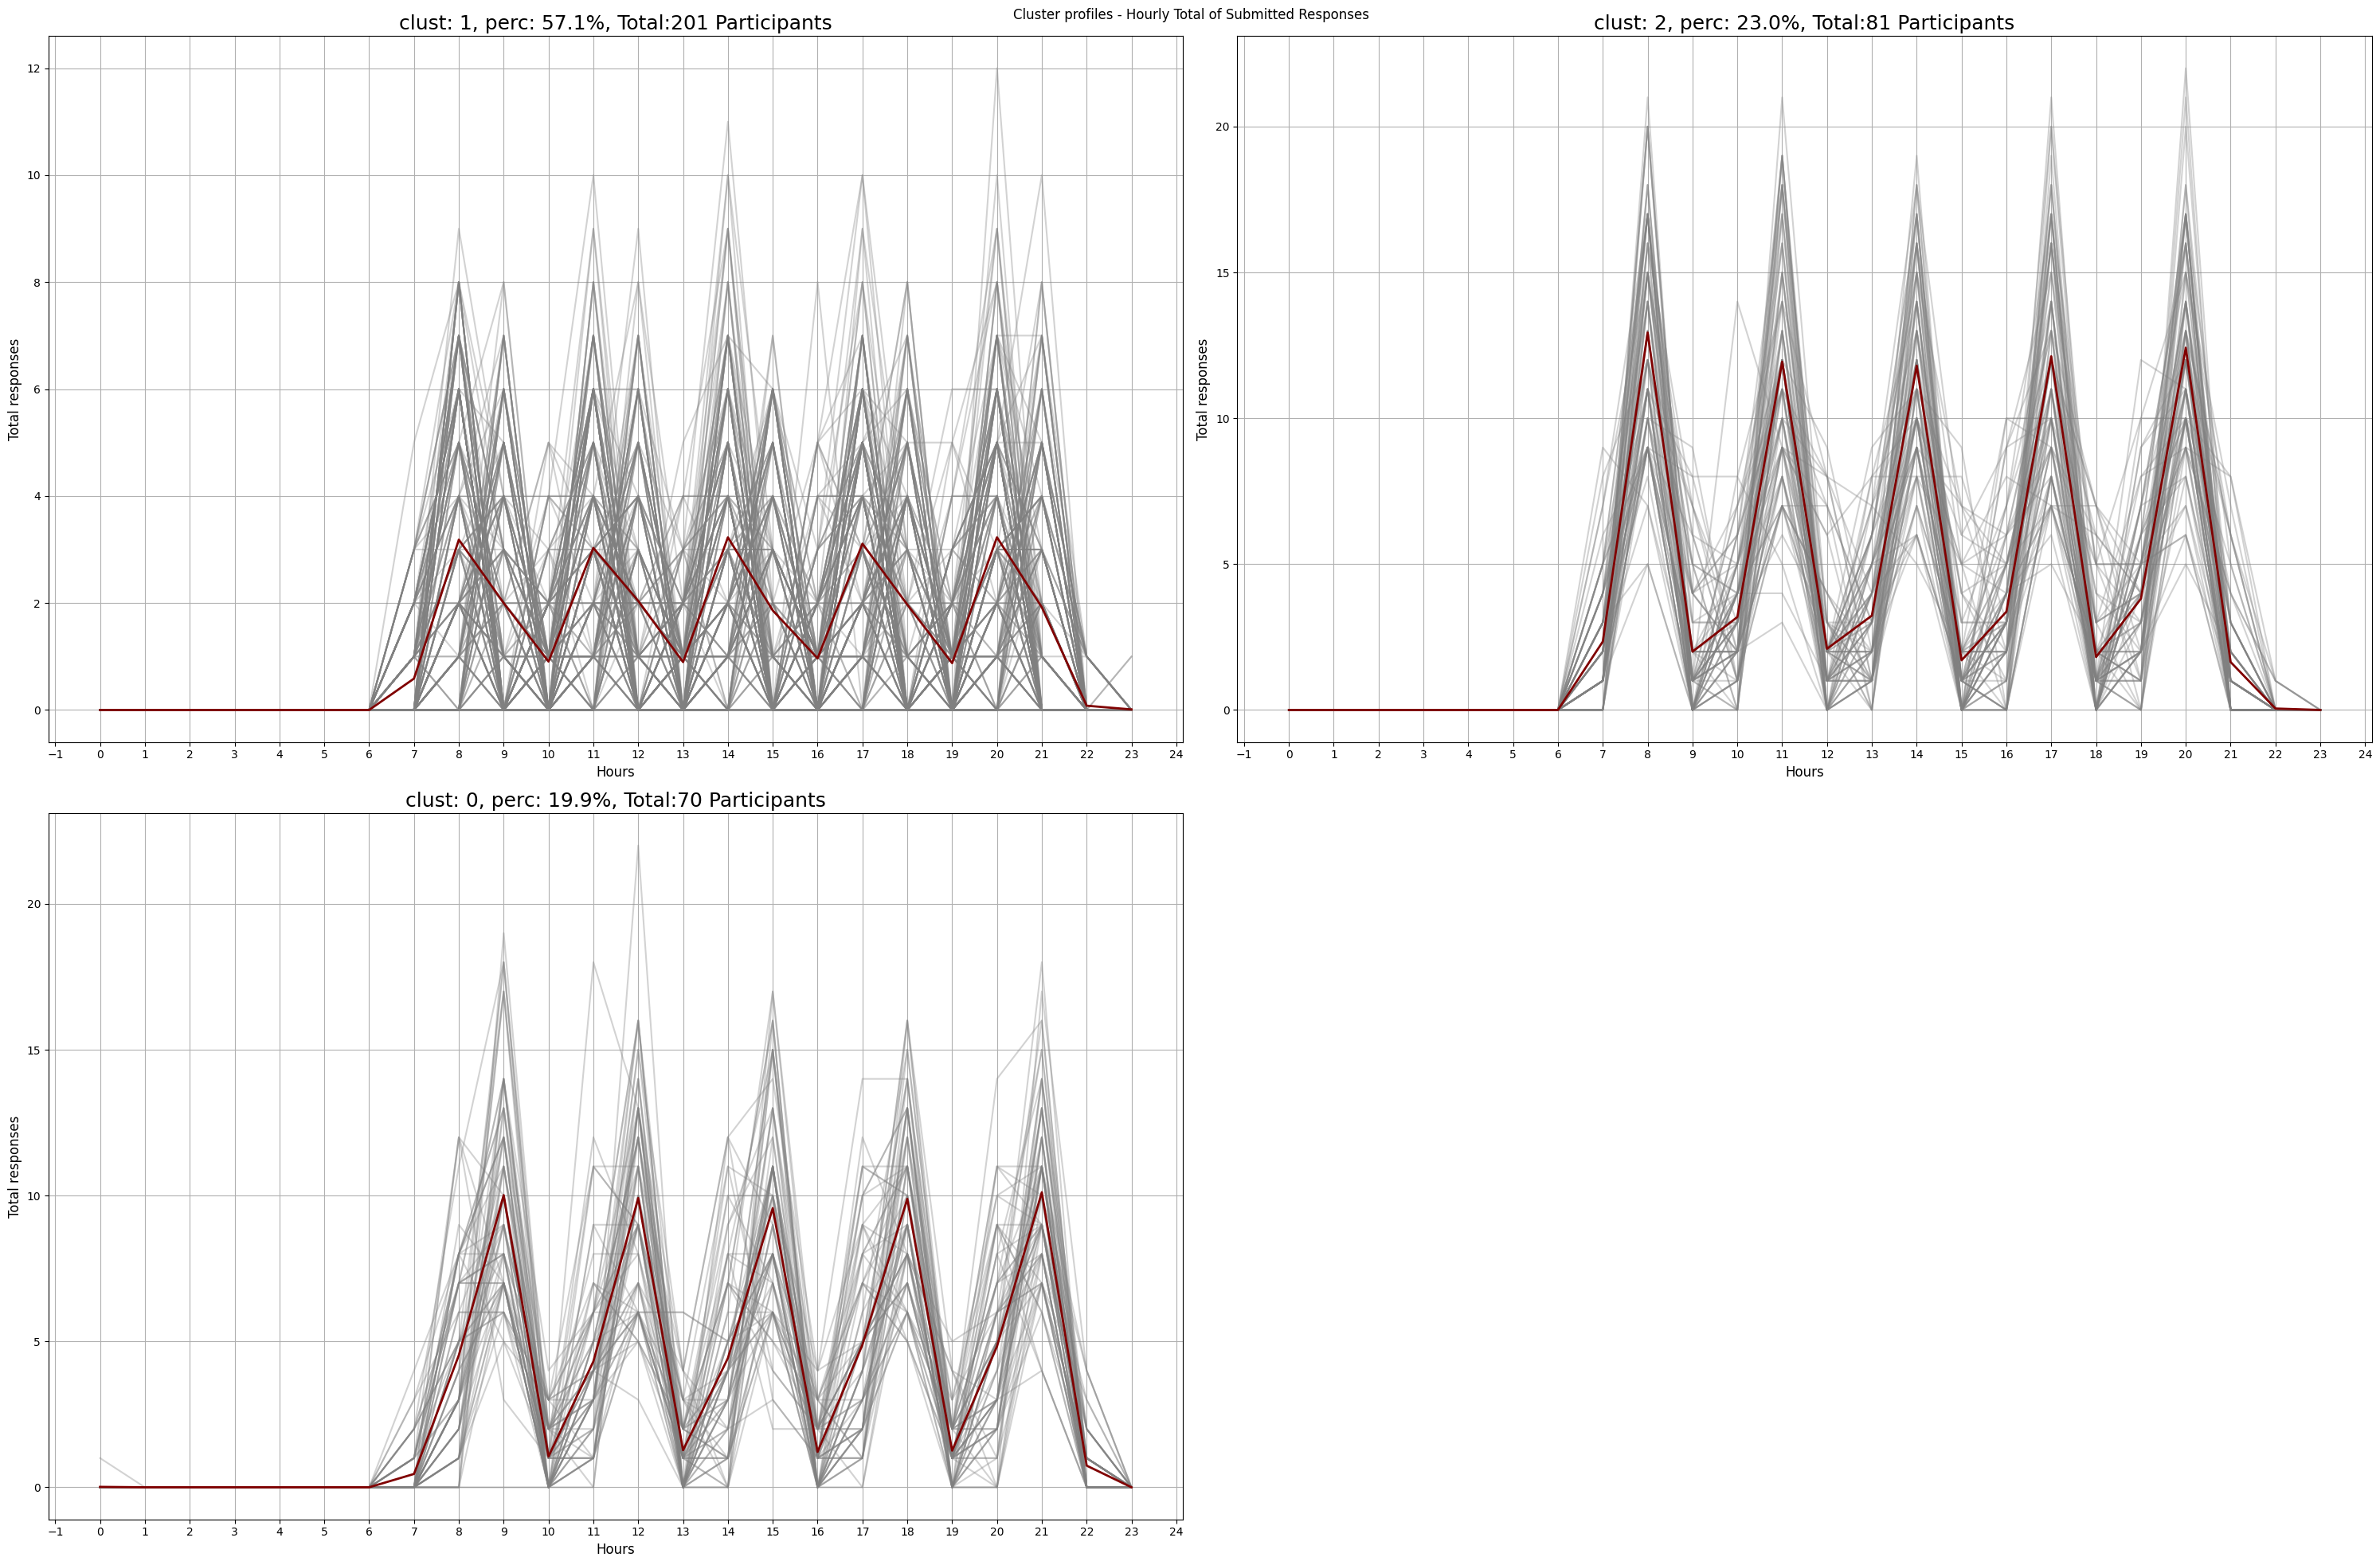

In [23]:
get_cluster_profiles(df_submit_hours, centroids_df, 'researchParticipantId', 'submitHour', n_cols=2)

RFM Analysis

Calculate Recency (R):
Recency measures how recently a customer has interacted with the app. We can calculate it by finding the difference between the latest 'probeTimestamp' and the 'engageTimestamp' for each 'researchParticipantId'.

Calculate Frequency (F):
Frequency measures how often a customer interacts with the app. We can calculate it by counting the number of unique 'surveyId' for each 'researchParticipantId'.

Calculate Monetary Value (M):
Monetary Value represents the 'reviewCount' as a proxy for the amount of contribution a participant has made to the app. We'll sum the 'reviewCount' for each 'researchParticipantId'.

In [ ]:
clean_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
# Group by 'researchParticipantId' and sort within each group by 'probeTimestamp' and 'submitTimestamp'
sorted_df = clean_df.groupby('researchParticipantId').apply(lambda x: x.sort_values(by=['probeTimestamp']))

<ipython-input-24-1b4a0ef33179>:2: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
sorted_df.dtypes

_id                                          object
appVersion                                  float64
engageTimestamp                 datetime64[ns, UTC]
probeTimestamp                  datetime64[ns, UTC]
researchParticipantId                        object
responseTimestamp               datetime64[ns, UTC]
reviewCount                                 float64
status                                       object
submitTimestamp                 datetime64[ns, UTC]
surveyId                                     object
timeBasedNotificationId                      object
timeBasedSurveyQuestionId                    object
created                         datetime64[ns, UTC]
downloadTimestamp               datetime64[ns, UTC]
mobileModelName                              object
mobileOperatingSystemVersion                 object
descriptionText                             float64
endTime                                      object
index                                         int64
initialiseNo

In [ ]:
one_person=sorted_df[sorted_df['researchParticipantId']=='621e31e76d80aa5e27a04935']

In [ ]:
one_person[['probeTimestamp','submitTimestamp','recency']]

In [ ]:
one_person['submitTimestamp'].isna().sum()

6

In [ ]:
one_person[1:]

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class,recency
1,6223da17b976240018699a93,3.5,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,5,5,9,2022,2,2,9,1,0,2.358333
2,6223da17b976240018699a80,3.5,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,5,5,9,2022,3,3,9,1,1,5.275000
3,622479b2e4c81200185f14d6,3.5,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,4,1,10,2,1,17.458333
4,6224ab092e1724001820a3f5,3.5,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,5,2,10,2,1,20.508333
6,6224df6e2e1724001820a570,3.5,2022-03-06 16:20:21+00:00,2022-03-06 15:11:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 16:20:24+00:00,0.0,responded,2022-03-06 16:21:02+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,6,3,10,2,1,23.625000
8,6224faad2e1724001820a6f9,3.5,2022-03-06 18:16:13+00:00,2022-03-06 17:46:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 18:16:41+00:00,0.0,responded,2022-03-06 18:17:17+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,7,4,10,2,1,2.208333
10,62251ee22e1724001820a81d,3.5,2022-03-06 20:50:13+00:00,2022-03-06 20:45:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 20:50:26+00:00,0.0,responded,2022-03-06 20:51:46+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,8,5,10,2,1,5.191667
13,6225d7d463acba0018f172be,3.5,2022-03-07 09:58:55+00:00,2022-03-07 09:10:00+00:00,621e31e76d80aa5e27a04935,2022-03-07 09:59:12+00:00,0.0,responded,2022-03-07 10:00:52+00:00,6217540ecac2480018cdd05b,...,0,7,10,2022,9,1,10,2,1,17.608333
14,622650547488500018eddc46,3.5,NaT,2022-03-07 11:45:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,0,7,10,2022,10,2,10,2,0,20.191667
16,622650547488500018eddc25,3.5,2022-03-07 14:59:00+00:00,2022-03-07 14:58:00+00:00,621e31e76d80aa5e27a04935,2022-03-07 14:59:11+00:00,0.0,responded,2022-03-07 14:59:53+00:00,6217540ecac2480018cdd05b,...,0,7,10,2022,11,3,10,2,1,23.408333


In [ ]:
from datetime
def calculte_recency(df):
 df['probeTimestamp']=pd.to_datetime(df['probeTimestamp'])
 df['submitTimestamp']=pd.to_datetime( df['submitTimestamp'])
 recency=[]
 last_submit_time=df['probeTimestamp'].min()
 recency.append(0)
 for index, row in df[1:].iterrows():
    if row['submitTimestamp']==np.nan :
      last_submit_time = row['submitTimestamp']
      last_submit_time=pd.to_datetime(last_submit_time)
    recency.append((row['probeTimestamp'] - last_submit_time).dt.total_seconds() / 3600.0)
 df['recency']=recency
 return df

In [ ]:
calculte_recency(one_person)

<ipython-input-144-69fd50637ff6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-69fd50637ff6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-69fd50637ff6>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class,recency
0,622382cae4c81200185f0d71,3.5,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,5,5,9,2022,1,1,9,1,1,0
1,6223da17b976240018699a93,3.5,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,5,5,9,2022,2,2,9,1,0,0 days 02:41:00
2,6223da17b976240018699a80,3.5,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,5,5,9,2022,3,3,9,1,1,0 days 05:36:00
3,622479b2e4c81200185f14d6,3.5,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,4,1,10,2,1,0 days 17:47:00
4,6224ab092e1724001820a3f5,3.5,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,5,2,10,2,1,0 days 20:50:00
6,6224df6e2e1724001820a570,3.5,2022-03-06 16:20:21+00:00,2022-03-06 15:11:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 16:20:24+00:00,0.0,responded,2022-03-06 16:21:02+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,6,3,10,2,1,0 days 23:57:00
8,6224faad2e1724001820a6f9,3.5,2022-03-06 18:16:13+00:00,2022-03-06 17:46:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 18:16:41+00:00,0.0,responded,2022-03-06 18:17:17+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,7,4,10,2,1,1 days 02:32:00
10,62251ee22e1724001820a81d,3.5,2022-03-06 20:50:13+00:00,2022-03-06 20:45:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 20:50:26+00:00,0.0,responded,2022-03-06 20:51:46+00:00,6217540ecac2480018cdd05b,...,6,6,9,2022,8,5,10,2,1,1 days 05:31:00
13,6225d7d463acba0018f172be,3.5,2022-03-07 09:58:55+00:00,2022-03-07 09:10:00+00:00,621e31e76d80aa5e27a04935,2022-03-07 09:59:12+00:00,0.0,responded,2022-03-07 10:00:52+00:00,6217540ecac2480018cdd05b,...,0,7,10,2022,9,1,10,2,1,1 days 17:56:00
14,622650547488500018eddc46,3.5,NaT,2022-03-07 11:45:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,0,7,10,2022,10,2,10,2,0,1 days 20:31:00


In [ ]:
grouped = sorted_df.groupby('researchParticipantId')

In [ ]:
participant_dfs=[]
for participant_id in sorted_df['researchParticipantId']:
  one_person=sorted_df[sorted_df['researchParticipantId']== participant_id]
  participant_dfs.append(one_person)

In [ ]:
participant_dfs[0]

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class
0,622382cae4c81200185f0d71,3.5,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,15,5,5,9,2022,1,1,9,1,1
1,6223da17b976240018699a93,3.5,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,17,5,5,9,2022,2,2,9,1,0
2,6223da17b976240018699a80,3.5,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,20,5,5,9,2022,3,3,9,1,1
3,622479b2e4c81200185f14d6,3.5,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,9,6,6,9,2022,4,1,10,2,1
4,6224ab092e1724001820a3f5,3.5,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,12,6,6,9,2022,5,2,10,2,1
6,6224df6e2e1724001820a570,3.5,2022-03-06 16:20:21+00:00,2022-03-06 15:11:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 16:20:24+00:00,0.0,responded,2022-03-06 16:21:02+00:00,6217540ecac2480018cdd05b,...,15,6,6,9,2022,6,3,10,2,1
8,6224faad2e1724001820a6f9,3.5,2022-03-06 18:16:13+00:00,2022-03-06 17:46:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 18:16:41+00:00,0.0,responded,2022-03-06 18:17:17+00:00,6217540ecac2480018cdd05b,...,17,6,6,9,2022,7,4,10,2,1
10,62251ee22e1724001820a81d,3.5,2022-03-06 20:50:13+00:00,2022-03-06 20:45:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 20:50:26+00:00,0.0,responded,2022-03-06 20:51:46+00:00,6217540ecac2480018cdd05b,...,20,6,6,9,2022,8,5,10,2,1
13,6225d7d463acba0018f172be,3.5,2022-03-07 09:58:55+00:00,2022-03-07 09:10:00+00:00,621e31e76d80aa5e27a04935,2022-03-07 09:59:12+00:00,0.0,responded,2022-03-07 10:00:52+00:00,6217540ecac2480018cdd05b,...,9,0,7,10,2022,9,1,10,2,1
14,622650547488500018eddc46,3.5,NaT,2022-03-07 11:45:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,11,0,7,10,2022,10,2,10,2,0


In [ ]:
for df in participant_dfs:
  calculate_recency(df)

In [ ]:
recency_df=pd.concat(participant_dfs)

In [ ]:
recency_df

In [ ]:
recency_df[recency_df['researchParticipantId']=='621e31e76d80aa5e27a04935'][['probeTimestamp','submitTimestamp','recency']]

,probeTimestamp,submitTimestamp,recency


In [ ]:
sorted_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class
0,622382cae4c81200185f0d71,3.50,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,15,5,5,9,2022,1,1,9,1,1
1,6223da17b976240018699a93,3.50,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,17,5,5,9,2022,2,2,9,1,0
2,6223da17b976240018699a80,3.50,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,20,5,5,9,2022,3,3,9,1,1
3,622479b2e4c81200185f14d6,3.50,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,9,6,6,9,2022,4,1,10,2,1
4,6224ab092e1724001820a3f5,3.50,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,12,6,6,9,2022,5,2,10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,646cca38c3a22000166722e4,3.80,NaT,2023-05-23 11:55:00+00:00,63da66a2f50dcfecb0751570,NaT,NaN,delivered,NaT,6282b681b4c68b0018c0a158,...,11,1,23,21,2023,61,2,73,4,0
26792,646ce1835d59aa001699d946,3.18,2023-05-23 15:53:15.437000+00:00,2023-05-23 14:54:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 15:53:23.279000+00:00,0.0,responded,2023-05-23 15:53:39.620000+00:00,6282b681b4c68b0018c0a158,...,14,1,23,21,2023,41,1,73,3,1
26793,646cfcce5d59aa001699d9bf,3.18,2023-05-23 17:48:01.714000+00:00,2023-05-23 17:47:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 17:48:06.449000+00:00,0.0,responded,2023-05-23 17:50:06.070000+00:00,6282b681b4c68b0018c0a158,...,17,1,23,21,2023,42,2,73,3,1
26794,646d27040a1a7e0016defa45,3.18,2023-05-23 20:49:13.556000+00:00,2023-05-23 20:48:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 20:49:16.473000+00:00,0.0,responded,2023-05-23 20:50:12.053000+00:00,6282b681b4c68b0018c0a158,...,20,1,23,21,2023,43,3,73,3,1


In [ ]:
from datetime import datetime

def find_previous_timestamp(dataset, participant_id, submitTimestamp):

    previous_timestamp = None

    for i, entry in enumerate(sorted_df):
        if entry['researchParticipantId'] == participant_id and entry['submitTimestamp'] == submitTimestamp:
            # Found the current activity entry for the given participant
            if i > 0:
                # Retrieve the entry just before the current entry in the sorted dataset
                previous_entry = sorted_dataset[i - 1]
                previous_timestamp = previous_entry['submitTimestamp']
            break

    return previous_timestamp

from datetime import datetime

def find_previous_timestamp(dataset, participant_id, submitTimestamp):
    previous_timestamp = None

    for i, entry in enumerate(dataset):
        if entry['researchParticipantId'] == participant_id and entry['submitTimestamp'] == submitTimestamp:
            # Found the current activity entry for the given participant
            if i > 0:
                # Retrieve the entry just before the current entry in the sorted dataset
                previous_entry = dataset[i - 1]
                previous_timestamp = previous_entry['submitTimestamp']
            break

    return previous_timestamp




In [ ]:
sorted_df

In [ ]:
from datetime import datetime
import pandas as pd

# Assuming 'sorted_df' is the DataFrame you want to process

def find_previous_timestamp(dataset, participant_id, submitTimestamp):
    previous_timestamp = None

    for i, entry in enumerate(dataset):
        if entry['researchParticipantId'] == participant_id and entry['submitTimestamp'] == submitTimestamp:
            # Found the current activity entry for the given participant
            if i > 0:
                # Retrieve the entry just before the current entry in the sorted dataset
                previous_entry = dataset[i - 1]
                previous_timestamp = previous_entry['submitTimestamp']
                print(previous_timestamp)
            break

    return previous_timestamp

In [ ]:
# Add a new column 'prevsubmitTimestamp' to the DataFrame with default value None
sorted_df['prevsubmitTimestamp'] = None

# Group by 'researchParticipantId' to apply the function separately for each participant
grouped = sorted_df.groupby('researchParticipantId')

In [ ]:
# Calculate and fill the 'prevsubmitTimestamp' column for each group
for participant_id, group in grouped:
    for i, row in group.iterrows():
        previous_timestamp = find_previous_timestamp(group.to_dict('records'), row['researchParticipantId'], row['submitTimestamp'])
        sorted_df.at[i, 'prevsubmitTimestamp'] = previous_timestamp

In [ ]:
sorted_df

In [ ]:
sorted_df['engageTimestamp'] =  pd.to_datetime(sorted_df['engageTimestamp'])
sorted_df['probeTimestamp'] =  pd.to_datetime(sorted_df['probeTimestamp'])
sorted_df['responseTimestamp'] =  pd.to_datetime(sorted_df['responseTimestamp'])
sorted_df['submitTimestamp'] =  pd.to_datetime(sorted_df['submitTimestamp'])
sorted_df['downloadTimestamp'] =  pd.to_datetime(sorted_df['downloadTimestamp'])
sorted_df['created'] =  pd.to_datetime(sorted_df['created'])
sorted_df['startTime'] =  pd.to_datetime(sorted_df['startTime'])
sorted_df['prevsubmitTimestamp'] = pd.to_datetime(sorted_df['prevsubmitTimestamp'])

In [ ]:
# Convert all timestamps to the same timezone (if they are in different timezones)
# Replace 'desired_timezone' with the timezone you want to convert the datetime to (e.g., 'UTC' or 'America/New_York')
desired_timezone = 'UTC'
sorted_df['probeTimestamp'] = sorted_df['probeTimestamp'].dt.tz_convert(desired_timezone)
sorted_df['submitTimestamp'] = sorted_df['submitTimestamp'].dt.tz_convert(desired_timezone)
sorted_df['prevsubmitTimestamp'] = sorted_df['prevsubmitTimestamp'].dt.tz_convert(desired_timezone)

In [ ]:
rfm_df = sorted_df

In [ ]:
# Calculate Recency (R) in hours
#current_date = pd.to_datetime('2023-07-22', utc=True)  # Set current_date to UTC to match the timezone of the columns
rfm_df['Recency'] = (rfm_df['probeTimestamp'] - rfm_df['prevsubmitTimestamp']).dt.total_seconds() / 3600

In [ ]:
# Calculate the Frequency (F) using cumcount
rfm_df['Frequency'] = rfm_df.groupby('researchParticipantId').cumcount()

In [ ]:
# Calculate Monetary Value (M) for each participant

rfm_df['Class_1_cumsum'] = rfm_df.groupby('researchParticipantId')['class'].apply(lambda x: x.eq(1).cumsum())
rfm_df['Class_0_cumsum'] = rfm_df.groupby('researchParticipantId')['class'].apply(lambda x: x.eq(0).cumsum())

# Calculate the 'Monetary' value by dividing the cumulative sum of 'Class_1' by the cumulative sum of 'Class_0' + 1
rfm_df['Monetary'] = rfm_df['Class_1_cumsum'] / (rfm_df['Class_0_cumsum']+1)

# Drop the intermediate columns 'Class_1_cumsum' and 'Class_0_cumsum' if desired
rfm_df.drop(['Class_1_cumsum', 'Class_0_cumsum'], axis=1, inplace=True)


In [ ]:
# Extract RFM features
rfm_df['RFM_Score'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']

# Categorize customers based on their RFM scores
def rfm_category(score):
    if score >= 8:
        return 'High Value'
    elif score >= 5:
        return 'Mid Value'
    else:
        return 'Low Value'

rfm_df['RFM_Category'] = rfm_df['RFM_Score'].apply(rfm_category)

In [ ]:
rfm_df

In [ ]:
rfm_df[rfm_df['researchParticipantId']=='621e31e76d80aa5e27a04935'][['probeTimestamp','submitTimestamp','Recency']]

In [ ]:
rfm_df['RFM_Category'].value_counts()

In [ ]:
rfm_df.to_csv('/content/drive/MyDrive/epro_project_data/rfm_df.csv', index=False)

Oversampling class Not responded

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

# Split the dataset into features (X) and the target variable (y)
X = clean_df.drop('class', axis=1)
y = clean_df['class']

In [ ]:
# Identify the minority class
minority_class = 0

In [ ]:
# Initialize the SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

## Model 1 :- Predicting if the user will respond to the notification

In [ ]:
clean_df.shape

(26796, 55)

In [ ]:
clean_df.isna().sum()

_id                                 0
appVersion                          0
engageTimestamp                  8288
probeTimestamp                      0
researchParticipantId               0
responseTimestamp                8288
reviewCount                      8288
status                              0
submitTimestamp                  8288
surveyId                            0
timeBasedNotificationId             0
timeBasedSurveyQuestionId           0
created                             0
downloadTimestamp                 971
mobileModelName                   971
mobileOperatingSystemVersion      971
descriptionText                 26796
endTime                             0
index                               0
initialiseNotifications             0
isFitbitSyncRequired            26778
isInitialised                       0
isQPROSurvey                    26778
isRelativeTiming                    0
isSetImmediately                26796
labelColor                          0
maxNumberOfP

In [ ]:
data_df = clean_df

In [ ]:
data_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
data_df.nunique()

_id                             26796
appVersion                         13
engageTimestamp                 18501
probeTimestamp                  21321
researchParticipantId             357
responseTimestamp               18499
reviewCount                         4
status                              4
submitTimestamp                 18501
surveyId                            4
timeBasedNotificationId            20
timeBasedSurveyQuestionId         340
created                           132
downloadTimestamp                 345
mobileModelName                   110
mobileOperatingSystemVersion       34
descriptionText                     0
endTime                             3
index                               6
initialiseNotifications             1
isFitbitSyncRequired                1
isInitialised                       1
isQPROSurvey                        1
isRelativeTiming                    1
isSetImmediately                    0
labelColor                          1
maxNumberOfP

In [ ]:
data_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class
0,622382cae4c81200185f0d71,3.50,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,15,5,5,9,2022,1,1,9,1,1
1,6223da17b976240018699a93,3.50,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,17,5,5,9,2022,2,2,9,1,0
2,6223da17b976240018699a80,3.50,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,20,5,5,9,2022,3,3,9,1,1
3,622479b2e4c81200185f14d6,3.50,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,9,6,6,9,2022,4,1,10,2,1
4,6224ab092e1724001820a3f5,3.50,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,12,6,6,9,2022,5,2,10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,646cca38c3a22000166722e4,3.80,NaT,2023-05-23 11:55:00+00:00,63da66a2f50dcfecb0751570,NaT,NaN,delivered,NaT,6282b681b4c68b0018c0a158,...,11,1,23,21,2023,61,2,73,4,0
26792,646ce1835d59aa001699d946,3.18,2023-05-23 15:53:15.437000+00:00,2023-05-23 14:54:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 15:53:23.279000+00:00,0.0,responded,2023-05-23 15:53:39.620000+00:00,6282b681b4c68b0018c0a158,...,14,1,23,21,2023,41,1,73,3,1
26793,646cfcce5d59aa001699d9bf,3.18,2023-05-23 17:48:01.714000+00:00,2023-05-23 17:47:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 17:48:06.449000+00:00,0.0,responded,2023-05-23 17:50:06.070000+00:00,6282b681b4c68b0018c0a158,...,17,1,23,21,2023,42,2,73,3,1
26794,646d27040a1a7e0016defa45,3.18,2023-05-23 20:49:13.556000+00:00,2023-05-23 20:48:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 20:49:16.473000+00:00,0.0,responded,2023-05-23 20:50:12.053000+00:00,6282b681b4c68b0018c0a158,...,20,1,23,21,2023,43,3,73,3,1


In [ ]:
#data_df.to_csv('/content/drive/MyDrive/epro_project_data/data_df.csv', index=False )

In [ ]:
#data_df.to_csv('/content/drive/MyDrive/PRACTICUM/LongCovid/data_df.csv', index=False )

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/epro_poject_data/data_df.csv')

In [ ]:
data_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,day_notification_number,Week_continue,cycle,class
0,622382cae4c81200185f0d71,3.50,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,15,5,5,9,2022,1,1,9,1,1
1,6223da17b976240018699a93,3.50,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,17,5,5,9,2022,2,2,9,1,0
2,6223da17b976240018699a80,3.50,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,20,5,5,9,2022,3,3,9,1,1
3,622479b2e4c81200185f14d6,3.50,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,9,6,6,9,2022,4,1,10,2,1
4,6224ab092e1724001820a3f5,3.50,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,12,6,6,9,2022,5,2,10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,646cca38c3a22000166722e4,3.80,NaT,2023-05-23 11:55:00+00:00,63da66a2f50dcfecb0751570,NaT,NaN,delivered,NaT,6282b681b4c68b0018c0a158,...,11,1,23,21,2023,61,2,73,4,0
26792,646ce1835d59aa001699d946,3.18,2023-05-23 15:53:15.437000+00:00,2023-05-23 14:54:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 15:53:23.279000+00:00,0.0,responded,2023-05-23 15:53:39.620000+00:00,6282b681b4c68b0018c0a158,...,14,1,23,21,2023,41,1,73,3,1
26793,646cfcce5d59aa001699d9bf,3.18,2023-05-23 17:48:01.714000+00:00,2023-05-23 17:47:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 17:48:06.449000+00:00,0.0,responded,2023-05-23 17:50:06.070000+00:00,6282b681b4c68b0018c0a158,...,17,1,23,21,2023,42,2,73,3,1
26794,646d27040a1a7e0016defa45,3.18,2023-05-23 20:49:13.556000+00:00,2023-05-23 20:48:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 20:49:16.473000+00:00,0.0,responded,2023-05-23 20:50:12.053000+00:00,6282b681b4c68b0018c0a158,...,20,1,23,21,2023,43,3,73,3,1


In [ ]:
data_df.columns

Index(['_id', 'appVersion', 'engageTimestamp', 'probeTimestamp',
       'researchParticipantId', 'responseTimestamp', 'reviewCount', 'status',
       'submitTimestamp', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId', 'created', 'downloadTimestamp',
       'mobileModelName', 'mobileOperatingSystemVersion', 'descriptionText',
       'endTime', 'index', 'initialiseNotifications', 'isFitbitSyncRequired',
       'isInitialised', 'isQPROSurvey', 'isRelativeTiming', 'isSetImmediately',
       'labelColor', 'maxNumberOfProbes', 'responseTimeLimitInMins',
       'startTime', 'timeBasedValidation', 'timeGapInMins', 'title', 'type',
       'validation', 'variance', 'install_created', 'deviceType', 'modified',
       'surveyIds', 'timeZone', 'HowLongToEngage', 'HowLongToSubmit',
       'submit_weekday', 'submitHour', 'probeTime_date', 'probeHour',
       'probe_weekday', 'probe_day', 'probeTime_week', 'probeTime_year',
       'notification_number', 'day_notification_numb

In [ ]:
features=[ 'appVersion', 'surveyId', 'timeBasedNotificationId',
       'timeBasedSurveyQuestionId',  'probe_day', 'probe_weekday', 'probeHour', 'maxNumberOfProbes', 'responseTimeLimitInMins',
        'timeGapInMins', 'title', 'deviceType', 'notification_number',
       'probeTime_week', 'cycle', 'probeTime_year', 'Week_continue', 'day_notification_number']

One hot encoding the categorical variables

In [ ]:
datacol =  data_df.columns

In [ ]:
result = set(datacol) - set(features)

In [ ]:
result

{'HowLongToEngage',
 'HowLongToSubmit',
 '_id',
 'class',
 'created',
 'descriptionText',
 'downloadTimestamp',
 'endTime',
 'engageTimestamp',
 'index',
 'initialiseNotifications',
 'install_created',
 'isFitbitSyncRequired',
 'isInitialised',
 'isQPROSurvey',
 'isRelativeTiming',
 'isSetImmediately',
 'labelColor',
 'mobileModelName',
 'mobileOperatingSystemVersion',
 'modified',
 'probeTime_date',
 'probeTimestamp',
 'researchParticipantId',
 'responseTimestamp',
 'reviewCount',
 'startTime',
 'status',
 'submitHour',
 'submitTimestamp',
 'submit_weekday',
 'surveyIds',
 'timeBasedValidation',
 'timeZone',
 'type',
 'validation',
 'variance'}

In [ ]:
# Categorical columns
categorical_cols = ['surveyId', 'timeBasedNotificationId', 'timeBasedSurveyQuestionId', 'title', 'deviceType']

In [ ]:
# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# Fit and transform the data
encoded_data = encoder.fit_transform(data_df[categorical_cols]).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


In [ ]:
encoded_df.shape

(26796, 372)

In [ ]:
# Concatenate the encoded DataFrame with the original DataFrame
final_df = pd.concat([data_df, encoded_df], axis=1)

In [ ]:
final_df

,_id,appVersion,engageTimestamp,probeTimestamp,researchParticipantId,responseTimestamp,reviewCount,status,submitTimestamp,surveyId,...,timeBasedSurveyQuestionId_6282b681b4c68b0018c0a1e2,timeBasedSurveyQuestionId_6282b681b4c68b0018c0a1e3,title_Bedtime,title_Early Afternoon,title_Evening,title_Late Afternoon,title_Morning,deviceType_android,deviceType_ios,deviceType_nan
0,622382cae4c81200185f0d71,3.50,2022-03-05 15:32:05+00:00,2022-03-05 15:14:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 15:32:22+00:00,0.0,responded,2022-03-05 15:33:30+00:00,6217540ecac2480018cdd05b,...,0,0,0,0,0,1,0,0,0,1
1,6223da17b976240018699a93,3.50,NaT,2022-03-05 17:55:00+00:00,621e31e76d80aa5e27a04935,NaT,NaN,delivered,NaT,6217540ecac2480018cdd05b,...,0,0,0,0,1,0,0,0,0,1
2,6223da17b976240018699a80,3.50,2022-03-05 21:43:59+00:00,2022-03-05 20:50:00+00:00,621e31e76d80aa5e27a04935,2022-03-05 21:44:12+00:00,0.0,responded,2022-03-05 21:45:59+00:00,6217540ecac2480018cdd05b,...,0,0,1,0,0,0,0,0,0,1
3,622479b2e4c81200185f14d6,3.50,2022-03-06 09:04:35+00:00,2022-03-06 09:01:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 09:04:39+00:00,0.0,responded,2022-03-06 09:06:57+00:00,6217540ecac2480018cdd05b,...,0,0,0,0,0,0,1,0,0,1
4,6224ab092e1724001820a3f5,3.50,2022-03-06 12:36:38+00:00,2022-03-06 12:04:00+00:00,621e31e76d80aa5e27a04935,2022-03-06 12:36:45+00:00,0.0,responded,2022-03-06 12:37:29+00:00,6217540ecac2480018cdd05b,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,646cca38c3a22000166722e4,3.80,NaT,2023-05-23 11:55:00+00:00,63da66a2f50dcfecb0751570,NaT,NaN,delivered,NaT,6282b681b4c68b0018c0a158,...,0,0,0,1,0,0,0,0,0,1
26792,646ce1835d59aa001699d946,3.18,2023-05-23 15:53:15.437000+00:00,2023-05-23 14:54:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 15:53:23.279000+00:00,0.0,responded,2023-05-23 15:53:39.620000+00:00,6282b681b4c68b0018c0a158,...,0,0,0,0,0,1,0,0,1,0
26793,646cfcce5d59aa001699d9bf,3.18,2023-05-23 17:48:01.714000+00:00,2023-05-23 17:47:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 17:48:06.449000+00:00,0.0,responded,2023-05-23 17:50:06.070000+00:00,6282b681b4c68b0018c0a158,...,0,0,0,0,1,0,0,0,1,0
26794,646d27040a1a7e0016defa45,3.18,2023-05-23 20:49:13.556000+00:00,2023-05-23 20:48:00+00:00,63da66a2f50dcfecb0751573,2023-05-23 20:49:16.473000+00:00,0.0,responded,2023-05-23 20:50:12.053000+00:00,6282b681b4c68b0018c0a158,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Define the features and target variables
features = final_df.drop(['HowLongToEngage',
 'HowLongToSubmit',
 '_id',
 'class',
 'created',
 'descriptionText',
 'downloadTimestamp',
 'endTime',
 'engageTimestamp',
 'index',
 'initialiseNotifications',
 'install_created',
 'isFitbitSyncRequired',
 'isInitialised',
 'isQPROSurvey',
 'isRelativeTiming',
 'isSetImmediately',
 'labelColor',
 'mobileModelName',
 'mobileOperatingSystemVersion',
 'modified',
 'probeTime_date',
 'probeTimestamp',
 'researchParticipantId',
 'responseTimestamp',
 'reviewCount',
 'startTime',
 'status',
 'submitHour',
 'submitTimestamp',
 'submit_weekday',
 'surveyIds',
 'timeBasedValidation',
 'timeZone',
 'type',
 'validation',
 'variance', 'surveyId' , 'timeBasedNotificationId', 'timeBasedSurveyQuestionId', 'title', 'deviceType'], axis=1)

target = final_df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target,  test_size=0.20)

In [ ]:
X_test

,appVersion,maxNumberOfProbes,responseTimeLimitInMins,timeGapInMins,probeHour,probe_weekday,probe_day,probeTime_week,probeTime_year,notification_number,...,timeBasedSurveyQuestionId_6282b681b4c68b0018c0a1e2,timeBasedSurveyQuestionId_6282b681b4c68b0018c0a1e3,title_Bedtime,title_Early Afternoon,title_Evening,title_Late Afternoon,title_Morning,deviceType_android,deviceType_ios,deviceType_nan
22189,3.80,8,75,1440,17,4,31,13,2023,11,...,0,0,0,0,1,0,0,1,0,0
5516,3.16,8,75,1440,19,5,3,35,2022,45,...,0,0,1,0,0,0,0,0,1,0
9061,3.16,8,75,1440,20,3,20,42,2022,168,...,0,0,1,0,0,0,0,0,1,0
18717,3.80,8,75,1440,15,6,12,10,2023,53,...,0,0,0,0,0,1,0,1,0,0
676,3.90,8,75,1440,16,2,11,19,2022,26,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17761,3.17,8,75,1440,17,3,23,8,2023,44,...,0,0,0,0,1,0,0,0,1,0
15580,3.80,8,75,1440,15,5,28,4,2023,54,...,0,0,0,0,0,1,0,1,0,0
17825,3.80,8,75,1440,15,5,25,8,2023,9,...,0,0,0,0,0,1,0,1,0,0
3519,3.13,8,75,1440,11,4,29,30,2022,7,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Fit the model to the data
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict the target variable
predictions = logreg.predict(X_test)

In [ ]:
# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print(score)

0.7106343283582089


In [ ]:
X= features
y= target

In [ ]:
!pip3 install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import average_precision_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Using StratifiedKFold for cross-validation with 'cv' number of folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Logistic Regression model with class_weight='balanced'
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)

# Initialize lists to store AUC-PR scores and confusion matrices for each fold
cv_scores = []
confusion_matrices = []

# Initialize an empty list to store predicted probabilities for all folds
y_probas_all_folds = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    logreg_model.fit(X_train, y_train)
    y_probas = logreg_model.predict_proba(X_test)[:, 1]

    # Append predicted probabilities for this fold to the list
    y_probas_all_folds.extend(y_probas)

    cv_scores.append(average_precision_score(y_test, y_probas))
    y_pred = logreg_model.predict(X_test)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Calculate the mean AUC-PR score across all folds
mean_auc_pr = np.mean(cv_scores)

# Find the best threshold that maximizes the mean AUC-PR score
precision, recall, thresholds = precision_recall_curve(y, y_probas_all_folds)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Display the tabular view of results
results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'AUC-PR Score': cv_scores,
    'Confusion Matrix': confusion_matrices
})

results_df['Confusion Matrix'] = results_df['Confusion Matrix'].apply(lambda x: '\n'.join([' '.join(map(str, row)) for row in x]))

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Mean AUC-PR: {mean_auc_pr:.4f}")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Threshold: 0.0334
Mean AUC-PR: 0.7761
+--------+----------------+--------------------+
|   Fold |   AUC-PR Score | Confusion Matrix   |
+========+================+====================+
|      1 |       0.766229 | 933 725            |
|        |                | 1488 2214          |
+--------+----------------+--------------------+
|      2 |       0.772774 | 960 697            |
|        |                | 1332 2370          |
+--------+----------------+--------------------+
|      3 |       0.82094  | 1058 599           |
|        |                | 1174 2528          |
+--------+----------------+--------------------+
|      4 |       0.756699 | 929 729            |
|        |                | 1512 2189          |
+--------+----------------+--------------------+
|      5 |       0.763864 | 981 677            |
|        |                | 1604 2097          |
+--------+----------------+--------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline model Scored 0.71